In [3]:
import pandas as pd 
import numpy as np

excel_file = pd.ExcelFile("./../data/momentum_data.xlsx")

sheet_names = excel_file.sheet_names
sheet_names

['descriptions',
 'factors (excess returns)',
 'momentum (excess returns)',
 'deciles (total returns)',
 'size_sorts (total returns)',
 'risk-free rate']

In [5]:
excel_file = pd.ExcelFile("./../data/barnstable_analysis_data.xlsx")

sheet_names = excel_file.sheet_names
sheet_names

['descriptions', 'data']

In [25]:
rf = pd.read_excel("./../data/momentum_data.xlsx", sheet_name="risk-free rate")
rf = rf.set_index("Date")
rf.head()

,RF
Date,
1927-01-31,0.0025
1927-02-28,0.0026
1927-03-31,0.0030
1927-04-30,0.0025
1927-05-31,0.0030


In [70]:
barnstable_data = pd.read_excel("./../data/barnstable_analysis_data.xlsx", sheet_name="data")
barnstable_data = barnstable_data.set_index("date")
barnstable_data.head()

,SPX,TB1M
date,,
1926-01-30,-0.001783,0.003061
1926-02-27,-0.033297,0.002612
1926-03-31,-0.057708,0.002601
1926-04-30,0.038522,0.002270
1926-05-28,0.013623,0.002691


In [7]:
factors = pd.read_excel("./../data/momentum_data.xlsx", sheet_name="factors (excess returns)")
factors = factors.set_index("Date")
factors.head()

,MKT,SMB,HML
Date,,,
1927-01-31,-0.0006,-0.0037,0.0454
1927-02-28,0.0418,0.0004,0.0294
1927-03-31,0.0013,-0.0165,-0.0261
1927-04-30,0.0046,0.0030,0.0081
1927-05-31,0.0544,0.0153,0.0473


In [9]:
momentum = pd.read_excel("./../data/momentum_data.xlsx", sheet_name="momentum (excess returns)")
momentum = momentum.set_index("Date")
momentum.head()

,UMD
Date,
1927-01-31,0.0036
1927-02-28,-0.0214
1927-03-31,0.0361
1927-04-30,0.0430
1927-05-31,0.0300


In [62]:
size_sorts = pd.read_excel("./../data/momentum_data.xlsx", sheet_name="size_sorts (total returns)")
size_sorts = size_sorts.set_index("Date")
size_sorts.head()

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718


In [10]:
deciles = pd.read_excel("./../data/momentum_data.xlsx", sheet_name="deciles (total returns)")
deciles = deciles.set_index("Date")
deciles.head()

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0446,0.0269,-0.0033,-0.0041,0.0097,0.0074,0.0036,-0.0041,-0.0024
1927-02-28,0.0753,0.0593,0.0825,0.0727,0.0322,0.0421,0.0283,0.0326,0.0420,0.0701
1927-03-31,-0.0323,-0.0301,-0.0392,-0.0477,-0.0048,-0.0242,0.0205,0.0041,0.0096,0.0547
1927-04-30,0.0204,-0.0320,-0.0247,-0.0137,0.0220,-0.0005,0.0205,-0.0059,0.0159,0.0549
1927-05-31,0.0272,0.0457,0.0595,0.0318,0.0636,0.0580,0.0496,0.0681,0.0811,0.0632


In [17]:
factors['UMD'] = momentum['UMD']
factors.columns

Index(['MKT', 'SMB', 'HML', 'UMD'], dtype='object')

In [20]:
annualization_factor = 12
def portfolio_metrics_basic(returns: pd.DataFrame, annualization_factor: float) -> pd.DataFrame: 
    '''
    Returns Annualized ER, Vol, SR, 
    '''
    
    returns_df = pd.DataFrame(index = returns.columns) 
    mu = returns.mean() * annualization_factor
    vol = returns.std() * np.sqrt(annualization_factor)
    sr = mu / vol

     # skewness -> dimensionless data
    skewness = returns.skew()

    # kurtosis-> dimensionless data
    kurtosis = returns.kurtosis()

    
    returns_df['Annualized Return'] = mu.values 
    returns_df['Annualized Vol'] = vol.values 
    returns_df['Annualized SR'] = sr.values
    returns_df['Skewness'] = skewness

    
    return returns_df


periods = [['1927', '2024'], ['1927', '1993'], ['1994', '2008'], ['2009', '2024']]
summary_col_names = ['Annualized Return','Annualized Vol','Annualized SR','Skewness']
res = []
for period in periods:
    temp = momentum.loc[period[0]:period[1]]
    temp_ff = factors.loc[period[0]:period[1]]
    summary = portfolio_metrics_basic(temp, annualization_factor)[summary_col_names]
    summary['mkt_corr'] = temp_ff.corr().loc['MKT',['UMD']]
    summary['val_corr'] = temp_ff.corr().loc['HML',['UMD']]
    summary = summary.T.iloc[:,0].rename(f'{period[0]} - {period[1]}')
    res.append(summary)
summary  = pd.concat(res, axis=1).T
summary

,Annualized Return,Annualized Vol,Annualized SR,Skewness,mkt_corr,val_corr
1927 - 2024,0.075328,0.162508,0.463534,-2.990493,-0.344284,-0.406410
1927 - 1993,0.090081,0.160003,0.562992,-3.808207,-0.362496,-0.495002
1994 - 2008,0.104373,0.175551,0.594548,-0.582038,-0.234519,-0.129361
2009 - 2024,-0.015092,0.158467,-0.095238,-2.691022,-0.367588,-0.320924


it doesnt change much but shows negative returns after 2009. 
- it was profitable in 2008  and momentum has a low correlation to both market and value factors -> good diversifier. if mean returns are near 0, the momentum is still valuable due to its low correlation to other factors  

In [47]:
long_only = (deciles['Hi PRIOR'] + deciles['Lo PRIOR'])/2 - rf['RF']
long_n_short_only = factors 

long_only_momentum = pd.merge(long_only.reset_index(), long_n_short_only.reset_index(), on = 'Date')
long_only_momentum.rename(columns = {0: 'long only', 'UMD': 'long and short'}, inplace=True)
long_only_momentum.set_index('Date', inplace=True)
long_only_momentum = long_only_momentum.loc['1994':'2024']
mom_names = ['long and short','long only']
summary_col_names = ['Annualized Return','Annualized Vol','Annualized SR','Skewness']
summary = portfolio_metrics_basic(long_only_momentum, annualization_factor)[summary_col_names]
summary['mkt_corr'] = long_only_momentum.corr().loc['MKT',mom_names]
summary['val_corr'] = long_only_momentum.corr().loc['HML',mom_names]
summary = summary.dropna()
summary

,Annualized Return,Annualized Vol,Annualized SR,Skewness,mkt_corr,val_corr
long only,0.086153,0.241933,0.356102,-0.045731,0.911967,-0.108536
long and short,0.043184,0.167682,0.257534,-1.445951,-0.306180,-0.215225


more attractive with respect to mean vol and sharpe ratio.  
-  long only portfolio has 91% correlation with the market while long and short has a negative correlation of -30.62%. so not as diversifying and exposed to market risk

<Axes: xlabel='Date'>

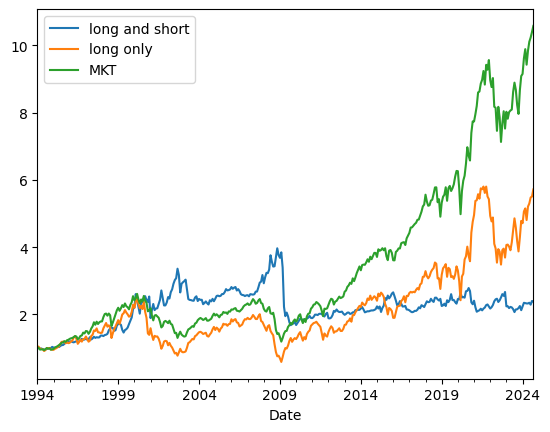

In [53]:

(1 + long_only_momentum[mom_names + ['MKT']].loc['1994':]).cumprod().plot()

In [58]:
ls_1decile = deciles['Hi PRIOR'] - deciles['Lo PRIOR']
ls_3decile = deciles.iloc[:,-3:].mean(axis = 1) - deciles.iloc[:,:3].mean(axis = 1)
ls_5decile = deciles.iloc[:,-5:].mean(axis = 1) - deciles.iloc[:,:5].mean(axis = 1)

ls_names = ['mom_D1','mom_D3','mom_D5']
temp = factors.copy()
temp[ls_names] = pd.concat([ls_1decile, ls_3decile, ls_5decile], axis=1)
summary = portfolio_metrics_basic(temp.loc["1994":, ls_names + ['UMD']], annualization_factor)[summary_col_names]
summary['mkt_corr'] = temp.corr().loc['MKT', ls_names + ['UMD']]
summary['val_corr'] = temp.corr().loc['HML', ls_names + ['UMD']]
summary

,Annualized Return,Annualized Vol,Annualized SR,Skewness,mkt_corr,val_corr
mom_D1,0.082010,0.299035,0.274248,-1.304629,-0.369000,-0.404373
mom_D3,0.028551,0.193383,0.147638,-1.345002,-0.381904,-0.396644
mom_D5,0.016411,0.133990,0.122480,-1.415925,-0.361677,-0.391819
UMD,0.043184,0.167682,0.257534,-1.445951,-0.344284,-0.406410


In [59]:
long short portfolio with higher threshold of decile has higher return but higher volatility 
- use 1-decile due to higher sharpe 


Index(['Lo PRIOR', 'PRIOR 2', 'PRIOR 3', 'PRIOR 4', 'PRIOR 5', 'PRIOR 6',
       'PRIOR 7', 'PRIOR 8', 'PRIOR 9', 'Hi PRIOR'],
      dtype='object')

In [64]:
size_sorts.columns


Index(['SMALL LoPRIOR', 'ME1 PRIOR2', 'SMALL HiPRIOR', 'BIG LoPRIOR',
       'ME2 PRIOR2', 'BIG HiPRIOR'],
      dtype='object')

In [63]:
mom_small = size_sorts['SMALL HiPRIOR'] - size_sorts['SMALL LoPRIOR']
mom_large = size_sorts['BIG HiPRIOR'] - size_sorts['BIG LoPRIOR']

mom_size_name = ['Small_stocks','Big_stocks']
temp = factors.copy()
temp[mom_size_name] = pd.concat([mom_small, mom_large], axis=1)
summary = portfolio_metrics_basic(temp.loc["1994":, ['UMD'] + mom_size_name], annualization_factor)[summary_col_names]
summary['mkt_corr'] = temp.corr().loc['MKT', ['UMD'] + mom_size_name]
summary['val_corr'] = temp.corr().loc['HML', ['UMD'] + mom_size_name]
summary.rename({'UMD':'All_stocks'})

,Annualized Return,Annualized Vol,Annualized SR,Skewness,mkt_corr,val_corr
All_stocks,0.043184,0.167682,0.257534,-1.445951,-0.344284,-0.406410
Small_stocks,0.063200,0.169633,0.372569,-1.763649,-0.331534,-0.388244
Big_stocks,0.023177,0.182458,0.127028,-0.879114,-0.324900,-0.386341


#### BarnStable Data

In [73]:
barnstable_data.head()

,SPX,TB1M
date,,
1926-01-30,-0.001783,0.003061
1926-02-27,-0.033297,0.002612
1926-03-31,-0.057708,0.002601
1926-04-30,0.038522,0.002270
1926-05-28,0.013623,0.002691


In [72]:
periods = [['1965', '1999'], ['2000', '2024'], ['1926', '2024']]
summary_col_names = ['Annualized Return','Annualized Vol']
res = []
for period in periods:
    temp = barnstable_data.loc[period[0]:period[1]]
    temp_ff = barnstable_data.loc[period[0]:period[1]]
    summary = portfolio_metrics_basic(temp, annualization_factor)[summary_col_names]
    summary = summary.T.iloc[:,0].rename(f'{period[0]} - {period[1]}')
    res.append(summary)
summary  = pd.concat(res, axis=1).T
summary

,Annualized Return,Annualized Vol
1965 - 1999,0.129354,0.149405
2000 - 2024,0.087283,0.153055
1926 - 2024,0.115535,0.186777


In [ ]:
periods = [['1965', '1999'], ['2000', '2024'], ['1926', '2024']]
summary_col_names = ['Annualized Return','Annualized Vol']
res = []
for period in periods:
    temp = barnstable_data.loc[period[0]:period[1]]
    temp_ff = barnstable_data.loc[period[0]:period[1]]
    summary = portfolio_metrics_basic(temp, annualization_factor)[summary_col_names]
    summary = summary.T.iloc[:,0].rename(f'{period[0]} - {period[1]}')
    res.append(summary)
summary  = pd.concat(res, axis=1).T
summary